<a href="https://colab.research.google.com/github/sushma-snk/Data_Pre_Processing/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing**

In [ ]:
# Clone dataset from github repository
!git clone https://github.com/VedaVinothiniShastra/DS_PT_2.git

Cloning into 'DS_PT_2'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 83 (delta 35), reused 63 (delta 15), pack-reused 0
Unpacking objects: 100% (83/83), 2.72 MiB | 4.69 MiB/s, done.


In [ ]:
!ls

DS_PT_2  sample_data


In [ ]:
# import required libraries
import pandas as pd
import numpy as np

Preprocessing Steps

1. Read the .csv file using pandas
2. Get column adj close in each file
3. Check for null value , if so drop
4. Sum the each stack company and store as 3 columns
5. Find Mean, Median and std
6. Plot the data in matplotlib

In [ ]:
def pre_processing(file_name):
  print("_____________________________________________________________________")
  print("Step 1. Read csv file")
  data = pd.read_csv(file_name)
  print(data.head())
  print(data.shape)
  print('_____________________________________________________________________')
  print("Step 2. Check number of missing data in every column of the dataset")
  print(data.isna().sum())
  print('_____________________________________________________________________')
  print("None of the columns have missing data")
  print('_____________________________________________________________________')
  print("Step3. Extract 'adj close' column from every dataset/")
  print('_____________________________________________________________________')
  AdjClose_data = data["Adj Close"]
  print(AdjClose_data)
  print('_____________________________________________________________________')
  return AdjClose_data

In [ ]:
apple_data = pre_processing("DS_PT_2/Mini/Mini-1/AAPL.csv")
amazon_data = pre_processing("DS_PT_2/Mini/Mini-1/AMZN.csv")
google_data = pre_processing("DS_PT_2/Mini/Mini-1/GOOG.csv")

_____________________________________________________________________
Step 1. Read csv file
         Date      Open      High       Low     Close  Adj Close     Volume
0  2000-01-03  3.745536  4.017857  3.631696  3.997768   3.596616  133949200
1  2000-01-04  3.866071  3.950893  3.613839  3.660714   3.293384  128094400
2  2000-01-05  3.705357  3.948661  3.678571  3.714286   3.341579  194580400
3  2000-01-06  3.790179  3.821429  3.392857  3.392857   3.052405  191993200
4  2000-01-07  3.446429  3.607143  3.410714  3.553571   3.196992  115183600
(4475, 7)
_____________________________________________________________________
Step 2. Check number of missing data in every column of the dataset
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
_____________________________________________________________________
None of the columns have missing data
_____________________________________________________________________
Step3. E

In [ ]:
print("Step 4. Concatenate adj close data from all three datasets")
print("_______________________________________________________________________")
AdjClose_data = pd.concat([apple_data, amazon_data, google_data], axis = 1)
print(AdjClose_data)

Step 4. Concatenate adj close data from all three datasets
_______________________________________________________________________
       Adj Close    Adj Close  Adj Close
0       3.596616    89.375000  49.845802
1       3.293384    81.937500  53.805050
2       3.341579    69.750000  54.346527
3       3.052405    65.562500  52.096165
4       3.196992    69.562500  52.657513
...          ...          ...        ...
4470  155.839996   990.989990        NaN
4471  155.899994   987.200012        NaN
4472  156.550003   995.000000        NaN
4473  156.000000  1000.929993        NaN
4474  156.990005  1002.940002        NaN

[4475 rows x 3 columns]


In [ ]:
# Renaming column names as all three columns have same names
col = list(AdjClose_data.columns)
col[0] = 'Apple Adj Close'
col[1] = 'Amazon Adj Close'
col[2] = 'Google Adj Close'
AdjClose_data.columns = col
print(AdjClose_data)

      Apple Adj Close  Amazon Adj Close  Google Adj Close
0            3.596616         89.375000         49.845802
1            3.293384         81.937500         53.805050
2            3.341579         69.750000         54.346527
3            3.052405         65.562500         52.096165
4            3.196992         69.562500         52.657513
...               ...               ...               ...
4470       155.839996        990.989990               NaN
4471       155.899994        987.200012               NaN
4472       156.550003        995.000000               NaN
4473       156.000000       1000.929993               NaN
4474       156.990005       1002.940002               NaN

[4475 rows x 3 columns]


In [ ]:
# Replacing null values with zeros as the google data has lesser rows when compared to amazon and apple
processed_data = AdjClose_data.fillna(0)
print(processed_data)

      Apple Adj Close  Amazon Adj Close  Google Adj Close
0            3.596616         89.375000         49.845802
1            3.293384         81.937500         53.805050
2            3.341579         69.750000         54.346527
3            3.052405         65.562500         52.096165
4            3.196992         69.562500         52.657513
...               ...               ...               ...
4470       155.839996        990.989990          0.000000
4471       155.899994        987.200012          0.000000
4472       156.550003        995.000000          0.000000
4473       156.000000       1000.929993          0.000000
4474       156.990005       1002.940002          0.000000

[4475 rows x 3 columns]


In [ ]:
print("Step 5. Finding mean, median and std")
print("_______________________________________________________________________")
# Mean and std is found out using describe function
stats = processed_data.describe().loc[['mean','std']]
print(stats)

Step 5. Finding mean, median and std
_______________________________________________________________________
      Apple Adj Close  Amazon Adj Close  Google Adj Close
mean        40.069959        199.754344        281.381018
std         43.478843        242.728656        254.699380


In [ ]:
# Finding median
med = processed_data.median()
med.name = 'median'
print(med)

Apple Adj Close      20.428621
Amazon Adj Close     80.239998
Google Adj Close    243.446609
Name: median, dtype: float64


In [ ]:
# Appending median to stats dataframe
stats.append(med)

<ipython-input-11-71828b75413f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats.append(med)


,Apple Adj Close,Amazon Adj Close,Google Adj Close
mean,40.069959,199.754344,281.381018
std,43.478843,242.728656,254.699380
median,20.428621,80.239998,243.446609


Step 6. Plotting


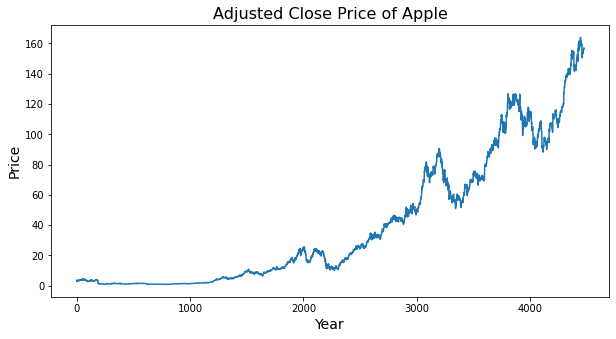

In [ ]:
print("Step 6. Plotting")
import matplotlib.pyplot as plt
processed_data['Apple Adj Close'].plot(figsize=(10, 5))
plt.title("Adjusted Close Price of Apple", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

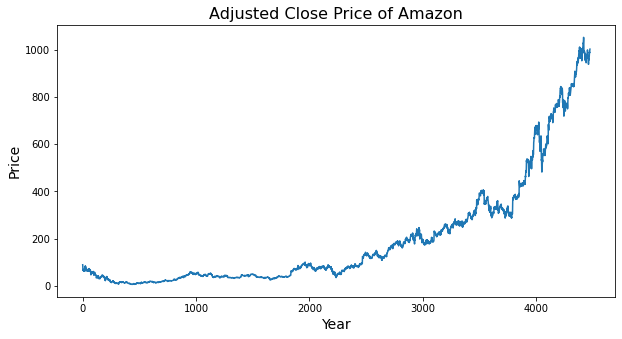

In [ ]:
processed_data['Amazon Adj Close'].plot(figsize=(10, 5))
plt.title("Adjusted Close Price of Amazon", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

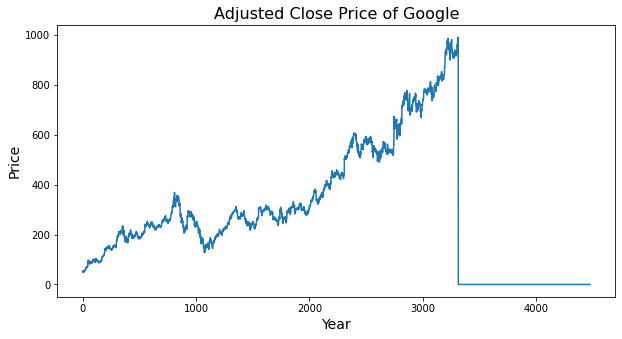

In [ ]:
processed_data['Google Adj Close'].plot(figsize=(10, 5))
plt.title("Adjusted Close Price of Google", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()